In [1]:
!pip install folium
!pip install pyldavis
wget https://tau-data.id/d/taudata_min.py
import warnings; warnings.simplefilter('ignore')
import taudata_min as tau, folium, pickle
from folium import plugins
import pandas as pd, seaborn as sns; sns.set()
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from folium.plugins import HeatMap

In [82]:
fData1 = 'https://tau-data.id/d/stunt1.pkl'
fData2 = 'https://tau-data.id/d/stunt2.pkl'
mulai, akhir = '2018-10-01', '2019-11-01'
'Done'

'Done'

In [88]:
# Loading Data for interactive visualizations
with open(fData1, 'rb') as f:
    places, tweets, Dt, koordinat, txtPlaces, lokasi = pickle.load(f)

with open(fData2, 'rb') as f:
    webpages, webCategory, df_w, Dw  = pickle.load(f)

In [51]:
tweets.head()

,username,date,tweet,sentiment,lat,lon,location
0,kompastv_jabar,"Nov,28",I added a video to a @YouTube playlist youtu.b...,pos,-6.91746,107.619,Bandung Kota Bandung Jawa Barat Indonesia
1,mediaindonesia,"08,Nov,18",Jawa Barat Kejar 2023 Bebas Stunting mediaindo...,net,-6.20876,106.846,Jakarta Daerah Khusus Ibukota Jakarta Indonesia
2,DinasKominfoKRW,"Dec,09","DEKLARASI KARAWANG BEBAS STUNTING\n\nKarawang,...",pos,-6.30540,107.320,Karawang East Karawang Karawang Regency West J...
3,awanmalangit,"Jan,28",1000 HPK ini merupakan kesempatan emas dalam m...,pos,-6.20876,106.846,Jakarta Daerah Khusus Ibukota Jakarta Indonesia
4,dinkesJKT,"Jan,25",Pemenuhan kebutuhan gizi masyarakat terutama p...,pos,-6.20876,106.846,Jakarta Daerah Khusus Ibukota Jakarta Indonesia


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 7 columns):
username     2598 non-null object
date         2598 non-null object
tweet        2598 non-null object
sentiment    2598 non-null object
lat          2598 non-null float64
lon          2598 non-null float64
location     2500 non-null object
dtypes: float64(2), object(5)
memory usage: 142.2+ KB


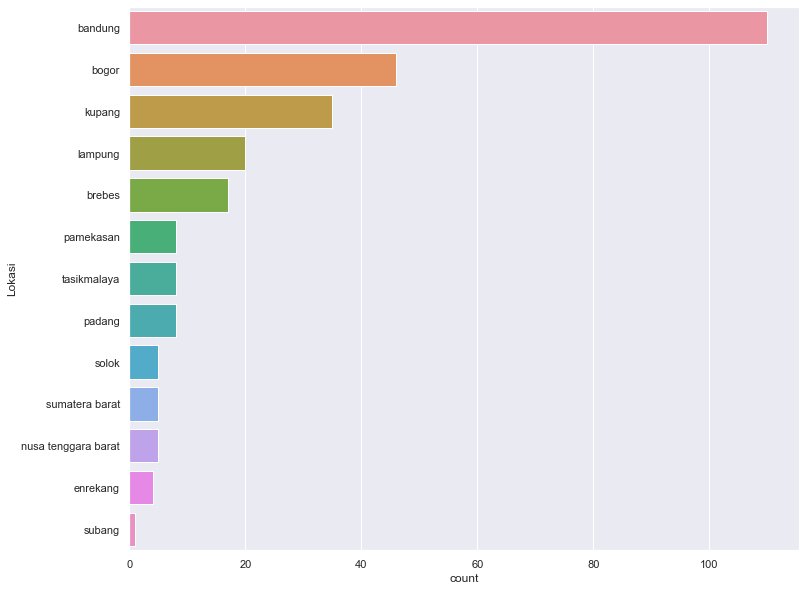

In [59]:
df = pd.DataFrame({'Lokasi':lokasi})
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(y = 'Lokasi', data = df, order = df['Lokasi'].value_counts().index)
plt.show()

In [89]:
print(places)

['brebes', 'tasikmalaya', 'pamekasan', 'subang', 'bandung', 'bogor', 'enrekang', 'solok', 'kutai', 'padang', 'lampung', 'sumatera barat', 'nusa tenggara barat', 'flores', 'kupang']


In [63]:
txtPlaces['brebes']

'Salah satu publikasi ke masyarakat tentang  bahaya stunting. \n\n(Via @desa_karangsari) \n#ElshintaEdisiMalam pic.twitter.com/gOFCfLUcE9\nPra Musdes Rembuk Stunting \nDesa Bodas Kecamatan Watukumpul Kabupaten Pemalang\n\n(Via @KpmdBodas) #ElshintaEdisiSore\npic.twitter.com/1W21haF1ol\nDiperkirakan 37% atau kurang 8-9 juta anak Indonesia menderita stunting dengan prevalensi yang merata hampir di semua provinsi.\nStunting tak hanya menimpa anak-anak dari keluarga miskin, tapi juga mereka yang bercukupan akibat kesalahan pola nutrisi. Mereka ada di sekitar kita.\nData stunting di Indonesia hanya tersedia sampai level kabupaten/kota. Studi ini bertujuan untuk mengestimasi prevalensi status gizi hingga tingkat desa, sehingga mempermudah geographical targeting. Live streaming: youtube.com/watch?v=6SP9F9â€¦ pic.twitter.com/lHrWrQU3tx\n"Kalo mau aksi nyata, ya turun langsung pastiin asupan nutrisi balita biar ga stunting!!!!11!siji"\n\n"Emang nulis paper bisa balikin kondisi nutrisi balita? N

In [7]:
tolerance = 10**-4
latID, lonID, count = -0.789275, 113.921, 1
lat, lon = [], []
for i, r in tqdm(tweets.iterrows()):
    if (r.lat!=0 and r.lon!=0) and (abs(r.lat-latID)>tolerance and abs(r.lon-lonID)>tolerance):
        lat.append(r.lat)
        lon.append(r.lon) 
count = [1]*len(lat)
df = pd.DataFrame({'lat':lat, 'lon':lon, 'count':count})
df.head()

,lat,lon,count
0,-6.91746,107.619,1
1,-6.20876,106.846,1
2,-6.30540,107.320,1
3,-6.20876,106.846,1
4,-6.20876,106.846,1


In [8]:
base_map = tau.generateBaseMap()
HeatMap(data=df[['lat', 'lon', 'count']].groupby(['lat', 'lon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

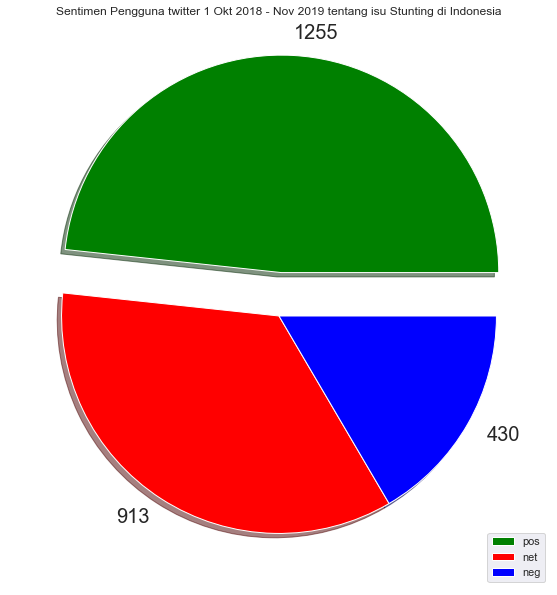

In [9]:
#df = pd.DataFrame({'Sentiment':sentiments})
c = tweets['sentiment'].value_counts()
values = c.values
colors = ['green', 'red', 'blue']
labels = c.index
explode = (0.2, 0, 0)
plt.figure(figsize=(12,10))

plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True, textprops={'fontsize': 20})
plt.title('Sentimen Pengguna twitter 1 Okt 2018 - Nov 2019 tentang isu Stunting di Indonesia\n\n')
plt.legend(labels,loc='best')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████| 2598/2598 [00:00<00:00, 651333.04it/s]


In total there are 4 major topics, distributed as follows


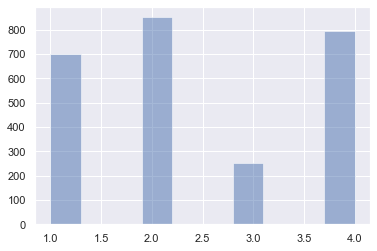

Printing top 4 Topics, with top 10 Words:
Topic #1:
anak gizi stunting gagal indonesia balita sehat cegah bayi generasi
Topic #2:
desa stunting jokowi pencegahan ekosandjojo kabupaten fachrilabalado anwsanusi penanganan konvergensi
Topic #3:
stunting isu puskesmas penanganan sosial kesehatan kepala iya debat lintas
Topic #4:
stunting indonesia prevalensi balita angka berita pemerintah aeur kabupaten kesehatan


In [14]:
# Mari kita dalami lebih jauh Topic Pembicaraan ini
k = 4 # Jumlah Topik ... menurut CV yg sudah dilakukan 4 adalah yg optimal. Tapi silahkan eksplore utk jumlah topik lainnya
Docs_t = [' '.join(d) for d in Dt]
tf_t, tm_t, vec_t = tau.getTopics(Docs_t, n_topics=k, Top_Words=10)

In [15]:
pyLDAvis.sklearn.prepare(tf_t, tm_t, vec_t)  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.239731 -0.114938       1        1  34.876394
3     -0.041912 -0.089127       2        1  27.341718
0     -0.242197 -0.051514       3        1  25.390913
2      0.044378  0.255580       4        1  12.390975, topic_info=     Category        Freq        Term       Total  loglift  logprob
310   Default  684.000000        desa  684.000000  30.0000  30.0000
38    Default  497.000000        anak  497.000000  29.0000  29.0000
450   Default  361.000000        gizi  361.000000  28.0000  28.0000
417   Default  225.000000       gagal  225.000000  27.0000  27.0000
1338  Default  204.000000  prevalensi  204.000000  26.0000  26.0000
...       ...         ...         ...         ...      ...      ...
747    Topic4   37.255549   kesehatan  243.193515   0.2121  -4.3549
1172   Topic4   25.466499  pencegahan  324.623090  -0.4571  -4.7353
265    Topic4   22.357692       cegah  247.798534  -0.3172  -4.8655
624    Topic4   16.759846         kah   85.865145   0.4544  -5.1537
740    Topic4   16.294705       kerja   46.838606   1.0323  -5.1818

[224 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         1  0.321597    acara
1         2  0.056752    acara
1         3  0.094587    acara
1         4  0.529689    acara
7         1  0.173344     aeur
...     ...       ...      ...
1761      3  0.834376     usia
1764      2  0.978322    utama
1768      4  0.914665    video
1774      1  0.977826    wakil
1787      1  0.961450  wilayah

[281 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

# Analisa pada data Website

In [64]:
webpages.head()

,URL_clean,Title,Desc,page
0,http://www.bangda.kemendagri.go.id/berita/baca...,Penilaian Percepatan Penurunan Stunting Diumum...,BALI – Direktur Jenderal Bina Pembangunan Daer...,for full functionality of this site it is nece...
1,http://www.bangda.kemendagri.go.id/berita/baca...,Fasilitasi Konsultasi Kabupaten Pakpak Bharat ...,"Jakarta, Ditjen Bina Pembangunan Daerah, Kemen...",for full functionality of this site it is nece...
2,http://www.bangda.kemendagri.go.id/galeri/deta...,Direktur PEIPD Ditjen Bina Pembangunan Daerah ...,"Oct 30, 2019 - Direktur PEIPD Ditjen Bina Pemb...",data e-government komunikasi birokrasi layanan...
3,http://www.bangda.kemendagri.go.id/galeri/deta...,Direktur SUPD 1 Ditjen Bina Pembangunan Daerah...,"Oct 29, 2019 - Direktur SUPD 1 Ditjen Bina Pem...",for full functionality of this site it is nece...
4,http://www.bangda.kemendagri.go.id/berita/baca...,Musyawarah Perencanaan Pembangunan Pertanian -...,"BOGOR, JAWA BARAT - Menteri Pertanian (Mentan)...",for full functionality of this site it is nece...


In [65]:
webpages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 4 columns):
URL_clean    1303 non-null object
Title        1303 non-null object
Desc         1303 non-null object
page         1301 non-null object
dtypes: object(4)
memory usage: 40.8+ KB


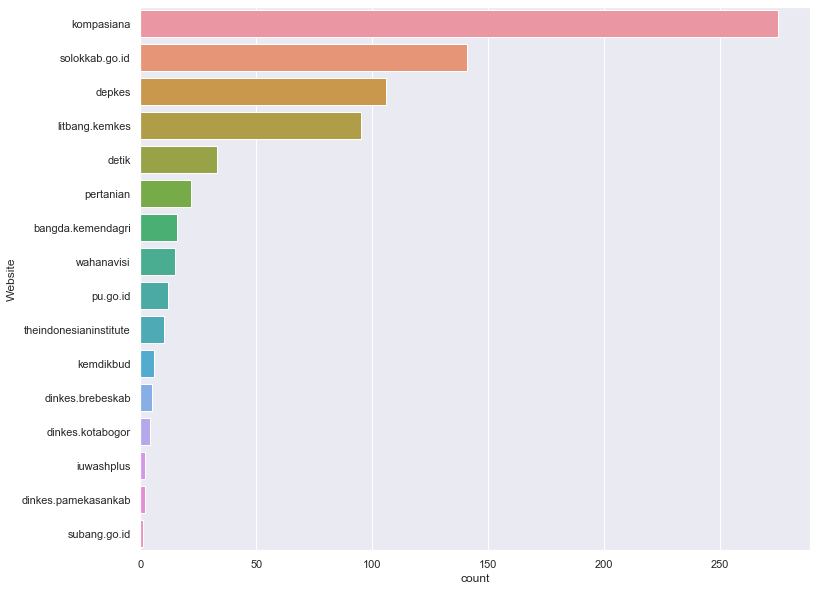

In [70]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(y = 'Website', data = df_w, order = df_w['Website'].value_counts().index)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████| 1303/1303 [00:00<00:00, 260432.60it/s]


In total there are 3 major topics, distributed as follows


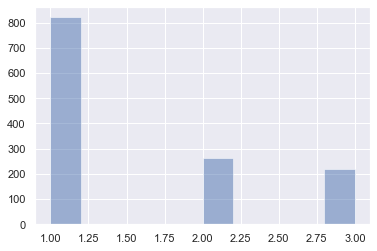

Printing top 3 Topics, with top 10 Words:
Topic #1:
solok kabupaten kecamatan daerah hadiri potensi buku danau bimtek pemerintah
Topic #2:
padang rakyat sumbar haluan solok koran kabupaten singgalang daerah posmetro
Topic #3:
anak desa indonesia visi program wahana sponsor wvi cerita kabupaten


In [22]:
# Mari kita dalami lebih jauh Topic Pembicaraan ini
k = 3
Docs_w = [' '.join(d) for d in Dw]
tf_w, tm_w, vec_w = tau.getTopics(Docs_w, n_topics=k, Top_Words=10)

In [23]:
pyLDAvis.sklearn.prepare(tf_w, tm_w, vec_w)  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.153054  0.169548       1        1  56.139447
1     -0.104307 -0.192400       2        1  31.993558
2      0.257361  0.022852       3        1  11.866995, topic_info=     Category         Freq        Term         Total  loglift  logprob
203   Default  8303.000000        anak   8303.000000  30.0000  30.0000
4563  Default  5754.000000      padang   5754.000000  29.0000  29.0000
1271  Default  3201.000000        desa   3201.000000  28.0000  28.0000
6558  Default  4413.000000      sumbar   4413.000000  27.0000  27.0000
5730  Default  5546.000000      rakyat   5546.000000  26.0000  26.0000
...       ...          ...         ...           ...      ...      ...
4857   Topic3   560.066134  pemerintah   4548.816420   0.0368  -4.8426
3830   Topic3   521.998800  masyarakat   4389.781914   0.0020  -4.9130
3856   Topic3   447.759509       media   2360.882844   0.4689  -5.0664
2645   Topic3   595.145678   kabupaten  14341.828407  -1.0507  -4.7818
3078   Topic3   368.483582       kerja   1437.382818   0.7702  -5.2613

[212 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
15        1  0.955146      acara
15        2  0.007091      acara
15        3  0.037922      acara
65        1  0.999073        agu
112       3  0.999111       akta
...     ...       ...        ...
7353      3  0.992101  wogalirit
7361      3  0.999554        wvi
7377      1  0.057957    yayasan
7377      2  0.042151    yayasan
7377      3  0.900967    yayasan

[322 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

# Social Network Analysis

In [76]:
Tweets = []
for i, r in tweets.iterrows():
    Tweets.append([r.username, r.tweet])
    
G = tau.Graph(Tweets)

Please wait, building Graph .... 



Finished. There are 2203 nodes (users) and 2009 edges (unique mention pairs) in the Graph.


In [77]:
# Let's now examine, who are the most "important" users in this Graph?
"""
silahkan pilih dari beberapa metode ini
degree = important karena banyak yang mention atau dimention
closeness = important karena jaraknya dengan semua user lain. Informasi akan cepat menyebar melalui orang ini
eigen = important karena user tersebut ber-degree tinggi atau degree rendah tapi mempengaruhi orang yg degree tinggi (kuda hitam)
betweeness = user-user ini important karena bisa mencegah suatu informasi menyebar lebih jauh

N = jumlah important user yang ingin ditampilkan
"""
Gt = tau.Centrality(G, N=5, method='degree')

Influencial Users: ['EkoSandjojo', 'jokowi', 'taufikmadjid71', 'fachrilabalado', 'anwsanusi']
Influencial Users Scores: [0.08764759 0.07538601 0.07311535 0.06584923 0.05858311]


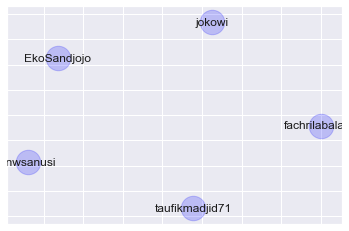

In [78]:
tau.drawGraph(Gt, Label = True)

# Pemisahan Text dan Topic Modelling Berdasarkan Kategori Web

In [79]:
webCategory.head()

,web,category,content
0,bangda.kemendagri,Pemerintah Pusat,Penilaian Percepatan Penurunan Stunting Diumum...
1,bangda.kemendagri,Pemerintah Pusat,Fasilitasi Konsultasi Kabupaten Pakpak Bharat ...
2,bangda.kemendagri,Pemerintah Pusat,Direktur PEIPD Ditjen Bina Pembangunan Daerah ...
3,bangda.kemendagri,Pemerintah Pusat,Direktur SUPD 1 Ditjen Bina Pembangunan Daerah...
4,bangda.kemendagri,Pemerintah Pusat,Musyawarah Perencanaan Pembangunan Pertanian -...


In [80]:
Cats = list(set(webCategory.category))
Cats

['NGO', 'Pemerintah Daerah', 'Pemerintah Pusat', 'Portal']

100%|██████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<?, ?it/s]


In total there are 2 major topics, distributed as follows


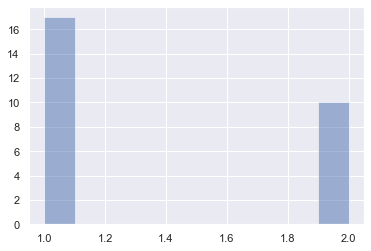

Printing top 3 Topics, with top 10 Words:
Topic #1:
dan solok bupati anak kabupaten yang desa untuk kecamatan daerah
Topic #2:
anak the kami sponsor dan and child wvi wahana yang
Topic #3:
bupati solok dan the kabupaten anak hadiri yang kecamatan daerah


In [81]:
# Silahkan rubah 'cat' menjadi = ['NGO', 'Pemerintah Daerah', 'Pemerintah Pusat', 'Portal']
# Lalu jalankan cell ini : "tombol ctrl+Enter"
cat, k = 'NGO', 3
Docs = []
for i, r in tqdm(webCategory.iterrows()):
    if r.category == cat:
        Docs.append(r.content)
        
tf, tm, vec = tau.getTopics(Docs, n_topics=k, Top_Words=10)

In [36]:
# Visualisasi topic dari cell diatas (tekan tombol ctrl+Enter, lalu tunggu ... biasanya agak lama utk graphics muncul)
pyLDAvis.sklearn.prepare(tf, tm, vec)  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.111044 -0.028629       1        1  62.411641
1      0.121922 -0.021593       2        1  37.532953
2     -0.010878  0.050222       3        1   0.055406, topic_info=     Category        Freq       Term       Total  loglift  logprob
184   Default  190.000000     bupati  190.000000  30.0000  30.0000
1127  Default  207.000000      solok  207.000000  29.0000  29.0000
1221  Default  171.000000        the  171.000000  28.0000  28.0000
495   Default  182.000000  kabupaten  182.000000  27.0000  27.0000
226   Default  376.000000        dan  376.000000  26.0000  26.0000
...       ...         ...        ...         ...      ...      ...
246    Topic3    0.014309       desa  125.485448  -1.5808  -6.4840
228    Topic3    0.011782      danau   42.618887  -0.6952  -6.6783
503    Topic3    0.013325       kami  167.414951  -1.9404  -6.5553
223    Topic3    0.012567      dalam  103.424961  -1.5173  -6.6139
528    Topic3    0.011844   kegiatan   52.786821  -0.9040  -6.6732

[224 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.039530  about
0         2  0.988241  about
1         1  0.931899  acara
1         2  0.069892  acara
26        1  0.722736  ajang
...     ...       ...    ...
1309      2  0.979400  world
1312      1  0.168507    wvi
1312      2  0.830497    wvi
1320      1  0.698700   yang
1320      2  0.301400   yang

[307 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

# Pemisahan, preprocessing, dan penyimpanan Text Tweets berdasarkan Lokus Penelitian dan Sentiment untuk dilakukan Text Analytics.

# Text Analytics dapat dilakukan dengan cara:

1. Buka https://voyant-tools.org/
2. Upload berbagai file Text, misal Tweet_solok.txt, Web_NGO.txt, dsb ==> file-file ini sudah dikirim melalui email dan WA
3. Pilih berbagai visualisasi yang dibutuhkan: WordCloud, WordLinks, Word Tree, dsb